In [2]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix 
import seaborn as sns
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
full_df = pd.read_csv('bank_marketing.csv')
full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [121]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 19 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null int64
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
year         4521 non-null int32
date         4521 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(8), object(9)
memory usage: 653.5+ KB


In [128]:
full_df.describe()

,age,balance,day,month,duration,campaign,pdays,previous,year
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.0
mean,41.170095,1422.657819,15.915284,6.166777,263.961292,2.793630,39.766645,0.542579,2018.0
std,10.576211,3009.638142,8.247667,2.378380,259.856633,3.109807,100.121124,1.693562,0.0
min,19.000000,-3313.000000,1.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,2018.0
25%,33.000000,69.000000,9.000000,5.000000,104.000000,1.000000,-1.000000,0.000000,2018.0
50%,39.000000,444.000000,16.000000,6.000000,185.000000,2.000000,-1.000000,0.000000,2018.0
75%,49.000000,1480.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000,2018.0
max,87.000000,71188.000000,31.000000,12.000000,3025.000000,50.000000,871.000000,25.000000,2018.0


In [136]:
full_df.loc[full_df['balance']>25000].sort_values(by='balance')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,year,date
1031,49,retired,single,primary,no,25824,no,no,unknown,17,6,94,1,-1,0,unknown,no,2018,2018-06-17
2196,54,management,divorced,tertiary,no,26306,yes,no,cellular,11,2,27,1,84,3,failure,no,2018,2018-02-11
3011,50,services,married,secondary,no,26394,no,no,cellular,25,8,206,4,-1,0,unknown,no,2018,2018-08-25
4047,75,retired,married,secondary,no,26452,no,no,telephone,15,7,219,2,-1,0,unknown,no,2018,2018-07-15
871,31,housemaid,single,primary,no,26965,no,no,cellular,21,4,654,2,-1,0,unknown,yes,2018,2018-04-21
3830,57,technician,married,tertiary,no,27069,no,yes,unknown,20,6,174,3,-1,0,unknown,no,2018,2018-06-20
1881,36,management,married,tertiary,no,27359,yes,no,unknown,3,6,71,2,-1,0,unknown,no,2018,2018-06-03
1483,43,technician,single,tertiary,no,27733,yes,no,unknown,3,6,164,7,-1,0,unknown,no,2018,2018-06-03
2989,42,entrepreneur,married,tertiary,no,42045,no,no,cellular,8,8,205,2,-1,0,unknown,no,2018,2018-08-08
3700,60,retired,married,primary,no,71188,no,no,cellular,6,10,205,1,-1,0,unknown,no,2018,2018-10-06


In [125]:
full_df.describe(include=[np.object])

,job,marital,education,default,housing,loan,contact,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,4,2
top,management,married,secondary,no,yes,no,cellular,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,3705,4000


In [4]:
# create a proper date field. we need to add a year, so lets make an assumption that this is 1 year of data (2018)

full_df['year'] = '2018'
full_df['year'] = full_df['year'].astype(int)

# will need to convert month from (mmm) to numeric, so we create a dictionary and map it back to the month column.

month_to_num = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
full_df['month'] = full_df['month'].map(month_to_num)

#finally we convert the 3 column into one date column.  
#not sure why but this would break if the columns were not labelled like this?

full_df['date']=pd.to_datetime(full_df[['year','month','day']])


In [5]:
full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,year,date
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown,no,2018,2018-10-19
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,5,220,1,339,4,failure,no,2018,2018-05-11
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,4,185,1,330,1,failure,no,2018,2018-04-16
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,6,199,4,-1,0,unknown,no,2018,2018-06-03
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,5,226,1,-1,0,unknown,no,2018,2018-05-05


### Step 1. Take a look at all the data 

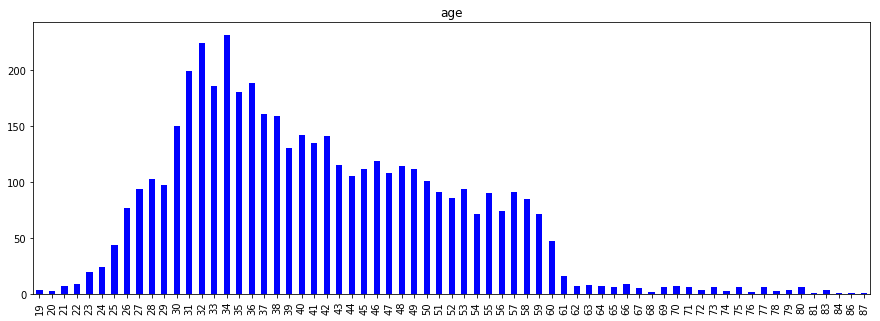

In [49]:
full_df['age'].value_counts().sort_index().plot(kind='bar',figsize=(15,5),colormap='winter',title='age')

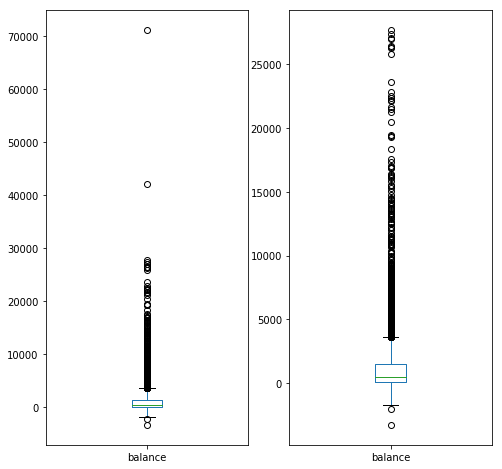

In [144]:
fig, axes = plt.subplots(1,2,figsize=(8,8))
full_df['balance'].plot(ax=axes[0],kind='box')
subset=full_df.loc[full_df['balance']<30000]
subset['balance'].plot(ax=axes[1],kind='box')

(array([1.000e+00, 1.000e+00, 2.000e+00, 2.800e+01, 1.690e+02, 1.971e+03,
        9.000e+02, 4.150e+02, 2.260e+02, 1.620e+02, 1.270e+02, 1.090e+02,
        6.900e+01, 6.700e+01, 4.100e+01, 2.800e+01, 3.200e+01, 2.200e+01,
        2.400e+01, 1.600e+01, 1.600e+01, 6.000e+00, 1.000e+01, 9.000e+00,
        3.000e+00, 6.000e+00, 7.000e+00, 7.000e+00, 6.000e+00, 3.000e+00,
        3.000e+00, 5.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00]),
 array([-3313.  , -2692.08, -2071.16, -1450.24,  -829.32,  -208.4 ,
          412.52,  1033.44,  1654.36,  2275.28,  2896.2 ,  3517.12,
         4138.04,  4758.96,  5379.88,  6000.8 ,  6621.72,  7242.64,
         7863.56,  8484.48,  9105.4 ,  9726.32, 10347.24, 10968.16,
        11589.08, 12210.  , 12830.92, 13451.84, 14072.76, 14693.68,
        15314.6 , 15935.52, 16556.44

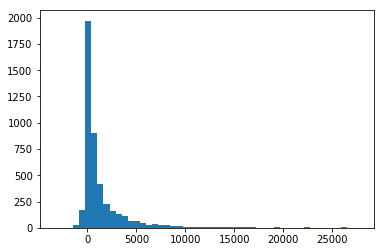

In [150]:
#full_df['balance'].plot(kind='hist')
num_bins=50
plt.hist(subset['balance'],num_bins)

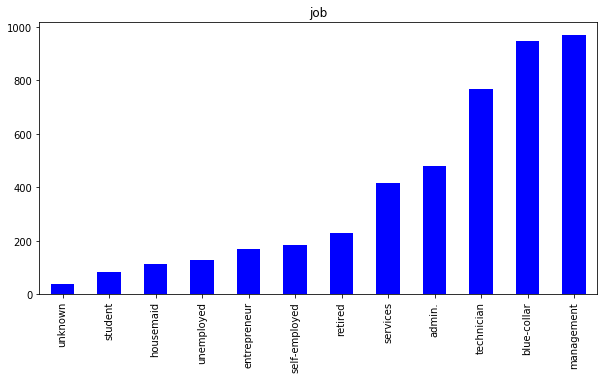

In [79]:
full_df['job'].value_counts().sort_values().plot(kind='kde',figsize=(10,5),colormap='winter',title='job')

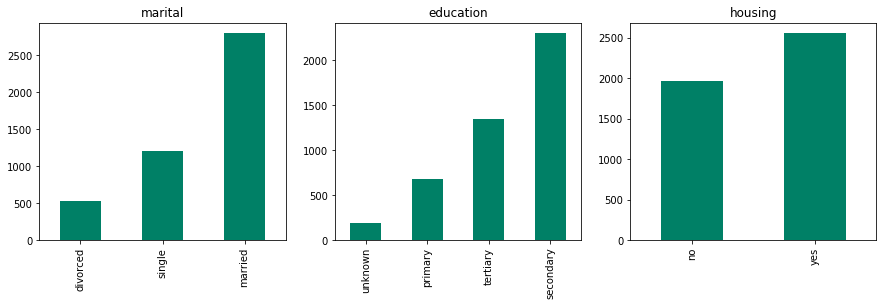

In [72]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
full_df['marital'].value_counts().sort_values().plot(ax=axes[0],kind='bar',colormap='summer',title='marital')
full_df['education'].value_counts().sort_values().plot(ax=axes[1],kind='bar',colormap='summer',title='education')
full_df['housing'].value_counts().sort_values().plot(ax=axes[2],kind='bar',colormap='summer',title='housing')

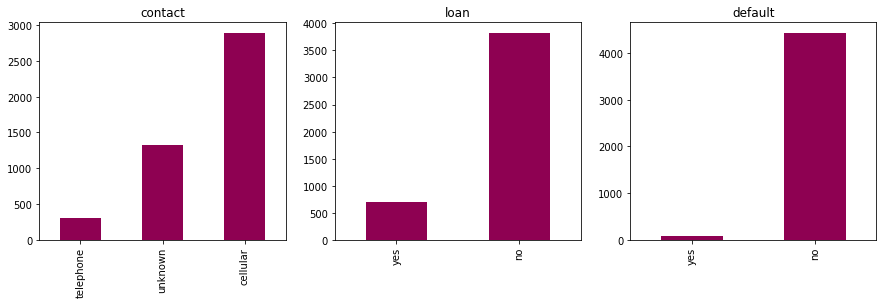

In [93]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
full_df['contact'].value_counts().sort_values().plot(ax=axes[0],kind='bar',colormap='PiYG',title='contact')
full_df['loan'].value_counts().sort_values().plot(ax=axes[1],kind='bar',colormap='PiYG',title='loan')
full_df['default'].value_counts().sort_values().plot(ax=axes[2],kind='bar',colormap='PiYG',title='default')

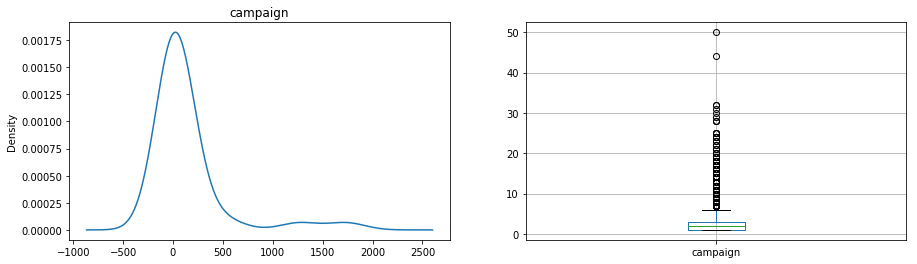

In [105]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
full_df['campaign'].value_counts().sort_index().plot(ax=axes[0],kind='kde',title='campaign')
full_df.boxplot(ax=axes[1],column=['campaign'])

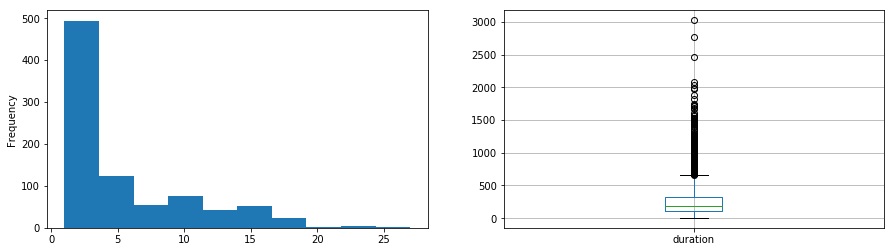

In [106]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
full_df['duration'].value_counts().sort_index().plot(ax=axes[0],kind='hist')
full_df.boxplot(ax=axes[1],column=['duration'])

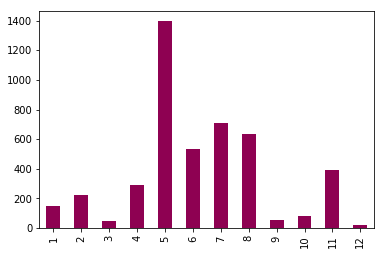

In [111]:
full_df['month'].value_counts().sort_index().plot(kind='bar',colormap='PiYG')

In [17]:
full_df['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [7]:
full_df[['education','balance']].groupby(['education'], as_index=False).mean()

,education,balance
0,primary,1411.544248
1,secondary,1196.814397
2,tertiary,1775.423704
3,unknown,1701.245989


In [119]:
full_df[['job','balance']].groupby(['job'], as_index=False).sum().sort_values(by='balance',ascending=False)

,job,balance
4,management,1712154
1,blue-collar,1026563
9,technician,1022205
0,admin.,586380
5,retired,533414
7,services,460350
2,entrepreneur,276381
6,self-employed,254811
3,housemaid,233386
10,unemployed,139446


In [9]:
full_df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

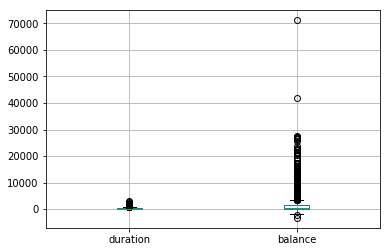

In [14]:
boxplot = full_df.boxplot(column=['duration','balance'])

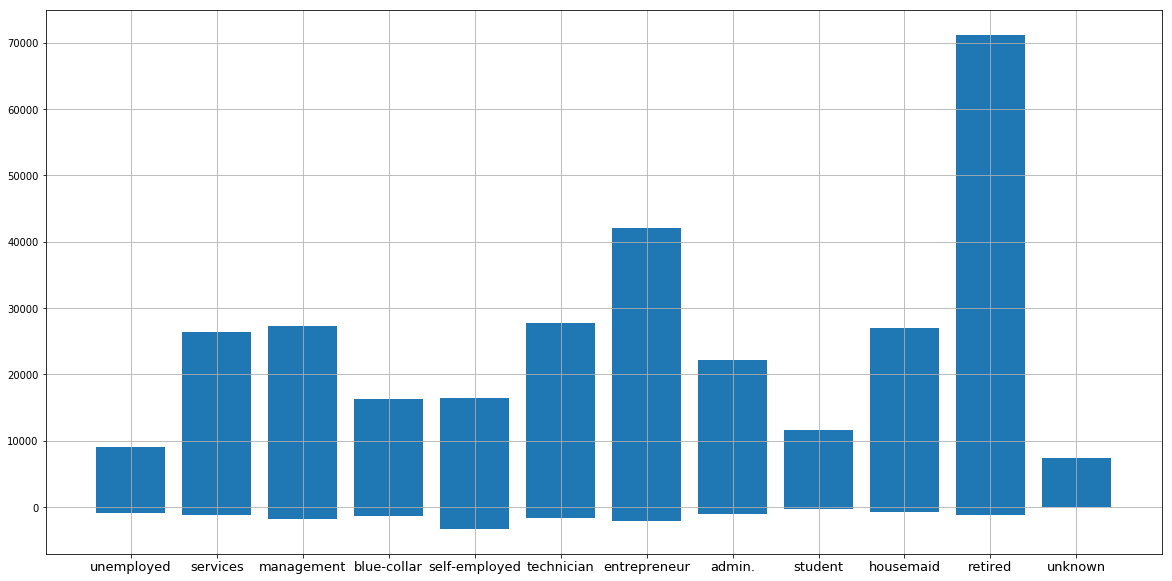

In [117]:
x=full_df['job']
y=full_df['balance']
fig = plt.figure(figsize=(20,10))
plt.xticks(size=13)
plt.grid(True)
plt.bar(x,y)
plt.show()

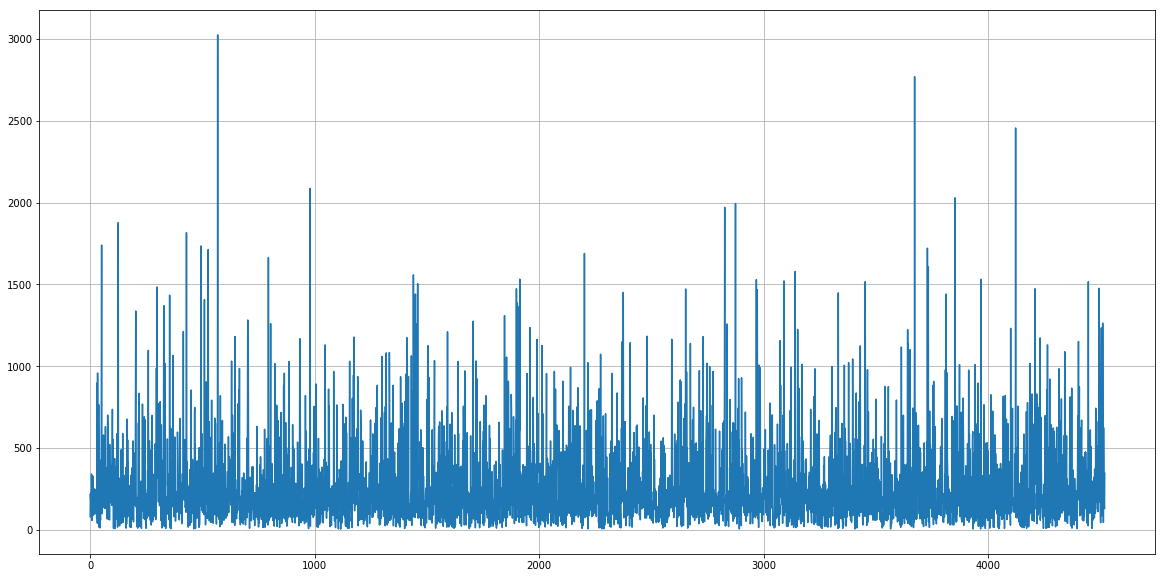

In [12]:
x=full_df['date']
y=full_df['duration']
fig = plt.figure(figsize=(20,10))
#plt.xticks(size=13)
plt.grid(True)
plt.plot(y)
plt.show()